# Bitcoin dataset analysis

## Data Cleaning
---

#### Loading bitcoin dataset from 2018

In [414]:
import pandas as pd
import pandas_bokeh

# set pandas_bokeh to output inline
pandas_bokeh.output_notebook()

bitcoin_2018 = pd.read_csv("datasets/BTC-2018min.csv")
bitcoin_2018.head()

Loading BokehJS ...

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1546300740,2018-12-31 23:59:00,BTC/USD,3689.26,3693.30,3689.26,3693.30,9.838855,36337.841473
1,1546300680,2018-12-31 23:58:00,BTC/USD,3689.26,3691.35,3689.26,3691.35,0.560000,2067.156000
2,1546300620,2018-12-31 23:57:00,BTC/USD,3688.83,3689.26,3688.83,3689.26,0.560833,2069.059602
3,1546300560,2018-12-31 23:56:00,BTC/USD,3687.87,3689.65,3686.92,3686.92,7.610240,28058.346208
4,1546300500,2018-12-31 23:55:00,BTC/USD,3688.28,3688.85,3685.00,3688.85,7.665703,28277.629729


#### About each Column:

- <strong>Unix Timestamp</strong> - This is the unix timestamp or also known as "Epoch Time". Use this to convert to your local timezone
- <strong>Date</strong> - This timestamp is UTC Timezone
- <strong>Symbol</strong> - The symbol for which the timeseries data refers
- <strong>Open</strong> - This is the opening price of the time period
- <strong>High</strong> - This is the highest price of the time period
- <strong>Low</strong> - This is the lowest price of the time period
- <strong>Close</strong> - This is the closing price of the time period
- <strong>Volume BTC</strong> - This is the volume that was transacted 
- <strong>Volume USD</strong> - This is the volume in the base/converted

#### Remove unecessary columns

In [415]:
bitcoin_2018 = bitcoin_2018.drop(['unix'], axis = 1)
bitcoin_2018 = bitcoin_2018.drop(['symbol'], axis = 1)

#### Index by date

In [416]:
bitcoin_2018['date'] = pd.to_datetime(bitcoin_2018['date'])
bitcoin_2018 = bitcoin_2018.set_index('date')

#### Reverse row order (From oldest to newest)

In [417]:
bitcoin_2018 = bitcoin_2018.iloc[::-1]
bitcoin_2018.head()

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2018-01-01 00:01:00,13841.01,13890.43,13841.01,13890.43,1.665850,23139.366704
2018-01-01 00:02:00,13846.64,13890.35,13846.64,13847.51,0.269346,3729.768382
2018-01-01 00:03:00,13847.51,13874.92,13823.19,13823.19,1.155274,15969.574078
2018-01-01 00:04:00,13823.19,13826.75,13803.20,13803.20,0.646691,8926.403003
2018-01-01 00:05:00,13826.10,13826.10,13734.45,13737.93,38.030409,522459.100423


#### Change column names

In [418]:
bitcoin_2018.rename(columns = {'Volume BTC': 'bitcoin', 'Volume USD': 'euro'}, inplace = True)
bitcoin_2018.head()

,open,high,low,close,bitcoin,euro
date,,,,,,
2018-01-01 00:01:00,13841.01,13890.43,13841.01,13890.43,1.665850,23139.366704
2018-01-01 00:02:00,13846.64,13890.35,13846.64,13847.51,0.269346,3729.768382
2018-01-01 00:03:00,13847.51,13874.92,13823.19,13823.19,1.155274,15969.574078
2018-01-01 00:04:00,13823.19,13826.75,13803.20,13803.20,0.646691,8926.403003
2018-01-01 00:05:00,13826.10,13826.10,13734.45,13737.93,38.030409,522459.100423


#### Convert USD columns to Euro (1 USD = 0.924428 EUR)

In [419]:
bitcoin_2018['open'] = bitcoin_2018['open'] * 0.924428
bitcoin_2018['close'] = bitcoin_2018['close'] * 0.924428
bitcoin_2018['high'] = bitcoin_2018['high'] * 0.924428
bitcoin_2018['low'] = bitcoin_2018['low'] * 0.924428
bitcoin_2018['euro'] = bitcoin_2018['euro'] * 0.924428

#### Describe dataframe

In [420]:
bitcoin_2018.describe()

,open,high,low,close,bitcoin,euro
count,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,5.255990e+05
mean,6956.112442,6961.189089,6950.673888,6956.089710,7.474384,5.403027e+04
std,2226.104552,2229.875668,2221.974645,2226.061106,17.935785,1.314561e+05
min,2888.329065,2895.179076,2886.323056,2888.329065,0.000000,0.000000e+00
25%,5888.236589,5890.131666,5885.897786,5888.282810,0.404663,2.563584e+03
50%,6381.002934,6385.366234,6377.564062,6380.965957,2.082416,1.376955e+04
75%,7928.879044,7936.893835,7920.203287,7928.818956,7.045175,4.923328e+04
max,15932.498091,15932.507336,15913.991043,15932.498091,747.429670,5.073933e+06


#### Info dataframe

In [421]:
bitcoin_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525599 entries, 2018-01-01 00:01:00 to 2018-12-31 23:59:00
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   open     525599 non-null  float64
 1   high     525599 non-null  float64
 2   low      525599 non-null  float64
 3   close    525599 non-null  float64
 4   bitcoin  525599 non-null  float64
 5   euro     525599 non-null  float64
dtypes: float64(6)
memory usage: 28.1 MB


## Resampling
---

#### Daily resample

In [422]:
# Get the max value and compare it from now on
max_daily_bitcoin_2018 = bitcoin_2018['high'].resample('D').max()
max_daily_bitcoin_2018

date
2018-01-01    12888.144069
2018-01-02    14104.487943
2018-01-03    14328.634000
2018-01-04    14264.173636
2018-01-05    15900.161600
                  ...     
2018-12-27     3550.885101
2018-12-28     3669.979160
2018-12-29     3662.445072
2018-12-30     3577.536360
2018-12-31     3552.475117
Freq: D, Name: high, Length: 365, dtype: float64

#### Weekly resample

In [423]:
max_weekly_bitcoin_2018 = bitcoin_2018['high'].resample('W').max()
max_weekly_bitcoin_2018

date
2018-01-07    15932.507336
2018-01-14    15068.176400
2018-01-21    13306.549426
2018-01-28    11083.105956
2018-02-04    10926.748204
2018-02-11     8403.790062
2018-02-18    10446.036400
2018-02-25    10889.761840
2018-03-04    10641.090708
2018-03-11    10804.714464
2018-03-18     9144.441776
2018-03-25     8493.736907
2018-04-01     7857.638000
2018-04-08     6939.533088
2018-04-15     7780.910476
2018-04-22     8353.612111
2018-04-29     9018.285087
2018-05-06     9197.115683
2018-05-13     8906.401566
2018-05-20     8228.241185
2018-05-27     7940.004535
2018-06-03     7201.931975
2018-06-10     7177.665740
2018-06-17     6397.014027
2018-06-24     6324.760735
2018-07-01     6018.026280
2018-07-08     6304.598960
2018-07-15     6299.717980
2018-07-22     7115.211385
2018-07-29     7854.827739
2018-08-05     7668.130260
2018-08-12     6616.990914
2018-08-19     6127.570998
2018-08-26     6384.848555
2018-09-02     6780.217166
2018-09-09     6851.721672
2018-09-16     6089.207

#### Monthly resample

In [424]:
max_monthly_bitcoin_2018 = bitcoin_2018['high'].resample('M').max()
max_monthly_bitcoin_2018


date
2018-01-31    15932.507336
2018-02-28    10889.761840
2018-03-31    10804.714464
2018-04-30     9018.285087
2018-05-31     9197.115683
2018-06-30     7201.931975
2018-07-31     7854.827739
2018-08-31     7175.003388
2018-09-30     6851.721672
2018-10-31     6245.435568
2018-11-30     6049.456832
2018-12-31     3942.685420
Freq: M, Name: high, dtype: float64

## Data visualization
---

In [425]:
max_daily_bitcoin_2018.plot_bokeh(figsize=(1200,600), legend="top_left", ylabel="Daily max", xlabel="Date", title="Daily max year overview bitcoin 2017")

Figure(id='10135', ...)

In [426]:
max_weekly_bitcoin_2018.plot_bokeh(figsize=(1200,600), legend="top_left", ylabel="Weekly max", xlabel="Date", title="Weekly max year overview bitcoin 2017")

Figure(id='10332', ...)

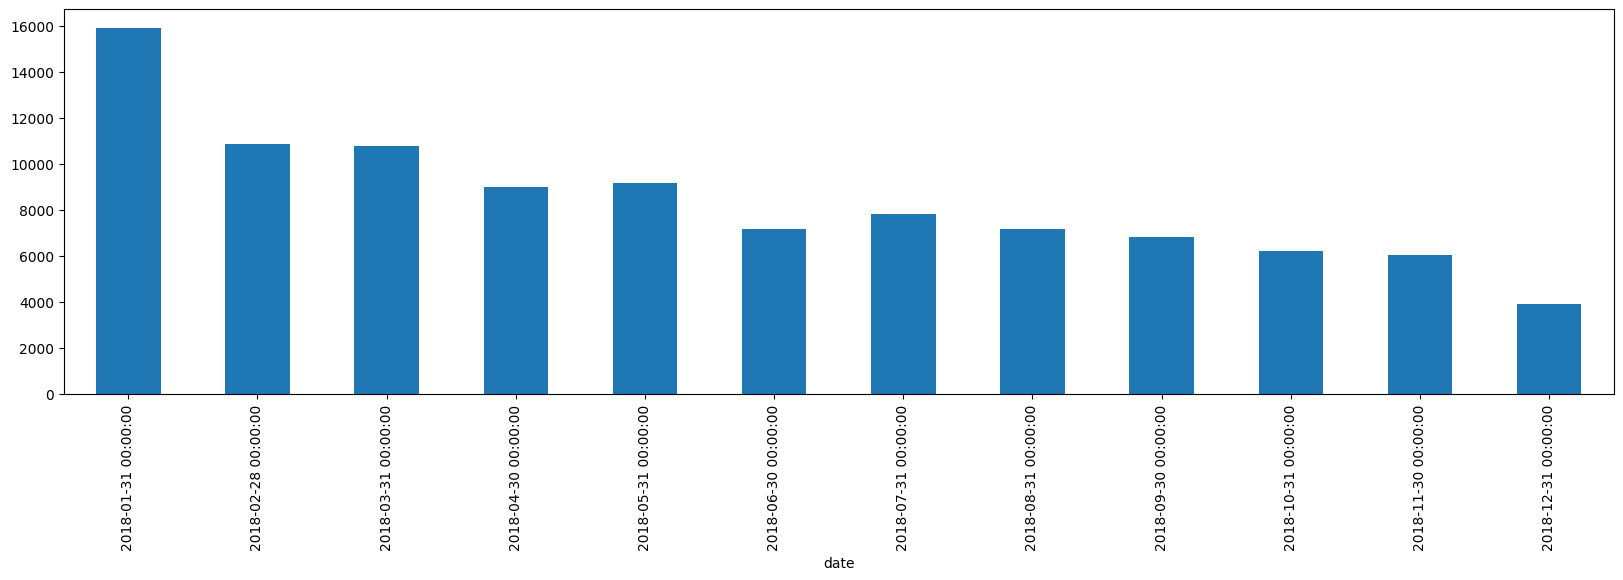

In [427]:
from bokeh.plotting import figure, show

max_monthly_bitcoin_2018.plot(kind='bar', figsize=(20, 5))

# https://docs.bokeh.org/en/latest/docs/user_guide/basic/bars.html#bars
p = figure(width=1200, height=600)
p.vbar(x=max_monthly_bitcoin_2018.index.tolist(), top=max_monthly_bitcoin_2018.tolist(), color="blue")
show(p)

#### Day with max and min price in each month

In [428]:
monthly_max_bitcoin_2018 = bitcoin_2018['high'].resample('M').max()

maxDaily = []
for col in monthly_max_bitcoin_2018:
    maxDaily.append(max_daily_bitcoin_2018[max_daily_bitcoin_2018 == col])
    
pd.DataFrame(maxDaily).transpose()

,high,high,high,high,high,high,high,high,high,high,high,high
date,,,,,,,,,,,,
2018-01-06,15932.507336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-20,NaN,10889.76184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-05,NaN,NaN,10804.714464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-25,NaN,NaN,NaN,9018.285087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-05,NaN,NaN,NaN,NaN,9197.115683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-03,NaN,NaN,NaN,NaN,NaN,7201.931975,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-24,NaN,NaN,NaN,NaN,NaN,NaN,7854.827739,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7175.003388,NaN,NaN,NaN,NaN
2018-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6851.721672,NaN,NaN,NaN


In [429]:
monthly_min_bitcoin_2018 = bitcoin_2018['high'].resample('M').min()
min_daily_bitcoin_2018 = bitcoin_2018['high'].resample('D').min()

minDaily = []
for col in monthly_min_bitcoin_2018:
    minDaily.append(min_daily_bitcoin_2018[min_daily_bitcoin_2018 == col])
    
pd.DataFrame(minDaily).transpose()

,high,high,high,high,high,high,high,high,high,high,high,high
date,,,,,,,,,,,,
2018-01-17,8578.996901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-06,NaN,5523.512766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-30,NaN,NaN,6101.2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-01,NaN,NaN,NaN,5952.60451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-29,NaN,NaN,NaN,NaN,6533.154539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-24,NaN,NaN,NaN,NaN,NaN,5360.600819,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12,NaN,NaN,NaN,NaN,NaN,NaN,5644.612834,NaN,NaN,NaN,NaN,NaN
2018-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5457.841401,NaN,NaN,NaN,NaN
2018-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5674.028133,NaN,NaN,NaN


## External data
---

#### Loading ethereum dataset

In [430]:
ethereum_dataset = pd.read_csv("datasets/ETH-USD.csv")
ethereum_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


#### Remove unecessary columns

In [431]:
ethereum_dataset = ethereum_dataset.drop(['Adj Close'], axis = 1)

#### Rename columns

In [432]:
ethereum_dataset.rename(columns = {'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'ethereum' }, inplace = True)

#### Index by date

In [433]:
ethereum_dataset['date'] = pd.to_datetime(ethereum_dataset['date'])
ethereum_dataset = ethereum_dataset.set_index('date')

In [434]:
ethereum_2018 = ethereum_dataset.loc[(ethereum_dataset.index >= '2018-01-01') & (ethereum_dataset.index <= '2018-12-31')].copy()

#### Convert USD columns to Euro (1 USD = 0.924428 EUR)

In [435]:
ethereum_2018['open'] = ethereum_2018['open'] * 0.924428
ethereum_2018['close'] = ethereum_2018['close'] * 0.924428
ethereum_2018['high'] = ethereum_2018['high'] * 0.924428
ethereum_2018['low'] = ethereum_2018['low'] * 0.924428

#### Aggregate bitcoin and ethereum data and remove unused columns 

In [436]:
bitcoin_2018 = bitcoin_2018.drop(['open', 'low', 'close', 'euro'], axis = 1)
bitcoin_2018.rename(columns = {'high': 'bitcoin price', 'bitcoin': 'bitcoin volume'}, inplace = True)

In [437]:
# Add new bitcoin total price column (euro)
bitcoin_2018['bitcoin total price'] = bitcoin_2018['bitcoin price'] * bitcoin_2018['bitcoin volume']

In [438]:
# Get last row for group
bitcoin_2018 = bitcoin_2018.resample('D').apply(lambda x : x.iloc[-1])

In [439]:
ethereum_2018 = ethereum_2018.drop(['open', 'low', 'close'], axis = 1)
ethereum_2018.rename(columns = {'high': 'ethereum price', 'ethereum': 'ethereum volume'}, inplace = True)

In [440]:
# Add new ethereum total price column (euro)
ethereum_2018['ethereum total price'] = ethereum_2018['ethereum price'] * ethereum_2018['ethereum volume']

In [441]:
ethereum_2018

,ethereum price,ethereum volume,ethereum total price
date,,,
2018-01-01,723.392670,2595760128,1.877754e+12
2018-01-02,845.694483,5783349760,4.890947e+12
2018-01-03,900.828285,5093159936,4.588063e+12
2018-01-04,966.101174,6502859776,6.282420e+12
2018-01-05,994.120641,6683149824,6.643857e+12
...,...,...,...
2018-12-27,122.650392,2612804378,3.204615e+11
2018-12-28,127.244758,3130201009,3.983017e+11
2018-12-29,135.922653,3169029972,4.307430e+11


In [448]:
dataframe = pd.concat([bitcoin_2018, ethereum_2018], axis=1)
dataframe.round(decimals=2)

,bitcoin price,bitcoin volume,bitcoin total price,ethereum price,ethereum volume,ethereum total price
date,,,,,,
2018-01-01,12427.83,7.75,96373.33,723.39,2595760128,1.877754e+12
2018-01-02,13575.23,126.69,1719797.42,845.69,5783349760,4.890947e+12
2018-01-03,14024.05,6.23,87379.37,900.83,5093159936,4.588063e+12
2018-01-04,14014.32,1.34,18742.40,966.10,6502859776,6.282420e+12
2018-01-05,15650.57,5.50,86112.26,994.12,6683149824,6.643857e+12
...,...,...,...,...,...,...
2018-12-27,3320.26,1.75,5796.58,122.65,2612804378,3.204615e+11
2018-12-28,3593.09,5.68,20394.90,127.24,3130201009,3.983017e+11
2018-12-29,3443.94,9.74,33543.73,135.92,3169029972,4.307430e+11


In [453]:
# Plot the price between bitcoin and ethereum
price = dataframe[['bitcoin price', 'ethereum price']]
price.plot_bokeh(figsize=(1200,600), legend="top_right", ylabel="Price", xlabel="Date", title="Price between bitcoin and ethereum")

Figure(id='12245', ...)

In [454]:
# Plot the transacted volume between bitcoin and ethereum
volume = dataframe[['bitcoin volume', 'ethereum volume']]
volume.plot_bokeh(figsize=(1200,600), legend="top_right", ylabel="Volume", xlabel="Date", title="Transacted volume between bitcoin and ethereum")

Figure(id='12641', ...)

In [456]:
# Plot the total price between bitcoin and ethereum
volume = dataframe[['bitcoin total price', 'ethereum total price']]
volume.plot_bokeh(figsize=(1200,600), legend="top_right", ylabel="Total", xlabel="Date", title="Total price between bitcoin and ethereum")

Figure(id='13060', ...)

The conclusion is that even the bitcoin being more popular and more expensive overall, the transactions with ethereum were way superior in terms of values sold.